In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
china1965 = pd.read_csv('Datos/income/income-1965-china.xls')
china2015 = pd.read_csv('Datos/income/income-2015-china.xls')
usa1965 = pd.read_csv('Datos/income/income-1965-usa.xls')
usa2015 = pd.read_csv('Datos/income/income-2015-usa.xls')

In [3]:
china1965.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
income          1000 non-null float64
log10_income    1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


In [4]:
china1965.dtypes

income          float64
log10_income    float64
dtype: object

In [5]:
china1965.head(3)

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857


In [6]:
china1965.min()

income          0.041968
log10_income   -1.377078
dtype: float64

In [7]:
china1965.max()

income          5.426802
log10_income    0.734544
dtype: float64

In [8]:
china1965.mean()

income          0.660597
log10_income   -0.274157
dtype: float64

In [9]:
china1965.var(ddof=0)

income          0.208846
log10_income    0.088610
dtype: float64

In [10]:
china1965.quantile([0.25, 0.75])

,income,log10_income
0.25,0.344130,-0.463277
0.75,0.863695,-0.063640


In [11]:
china1965.quantile(0.25)

income          0.344130
log10_income   -0.463277
Name: 0.25, dtype: float64

In [12]:
china1965.median()

income          0.557477
log10_income   -0.253773
dtype: float64

In [13]:
scipy.stats.percentileofscore(china1965.income, 1.5)

95.5

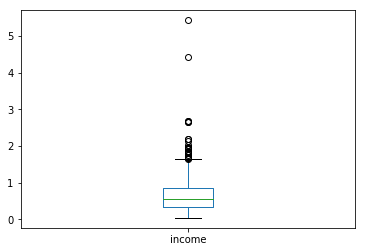

In [14]:
china1965.income.plot(kind='box')

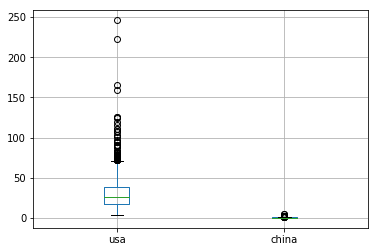

In [15]:
pd.DataFrame({'usa':usa1965.income, 'china':china1965.income}).boxplot()

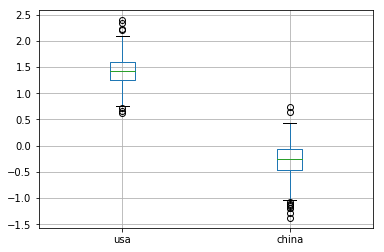

In [16]:
pd.DataFrame({'usa':usa1965.log10_income, 'china':china1965.log10_income}).boxplot()

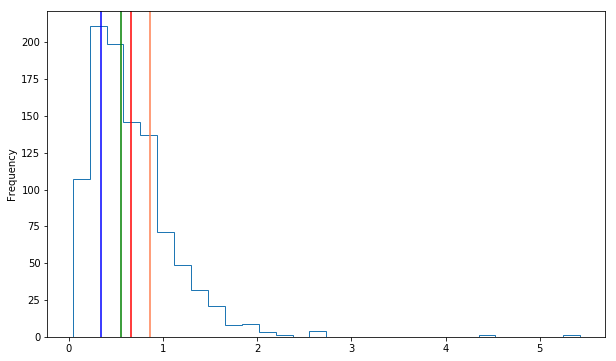

In [17]:
china1965.income.plot(kind="hist", histtype="step", bins=30, figsize=(10,6))
plt.axvline(china1965.income.mean(), c='red')
plt.axvline(china1965.income.median(), c='green')
plt.axvline(china1965.income.quantile(0.25), c='blue')
plt.axvline(china1965.income.quantile(0.75), c='coral')

(0, 3, 0.0, 1.2342999882944066)

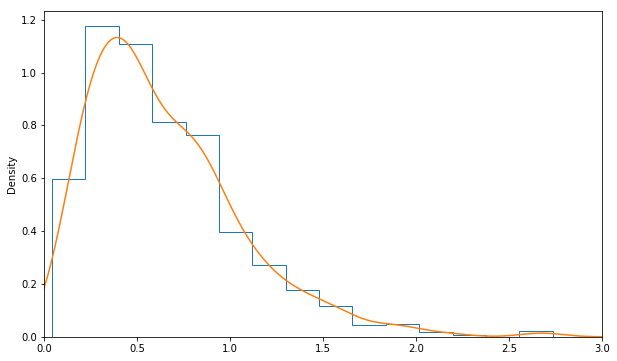

In [18]:
china1965.income.plot(kind="hist", histtype='step', bins=30, density=True, figsize=(10,6))
china1965.income.plot.density()
plt.axis(xmin=0, xmax=3)

([<matplotlib.axis.XTick at 0xdd240d0>,
 <a list of 9 Text xticklabel objects>)

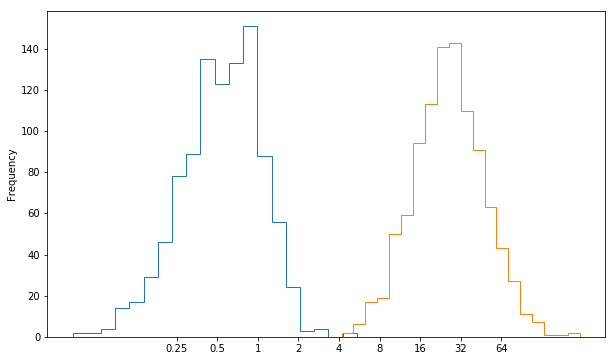

In [19]:
china1965.log10_income.plot(kind="hist", histtype="step", bins=20, figsize=(10,6))
usa1965.log10_income.plot(kind="hist", histtype="step", bins=20)
levels = [0.25,0.5,1,2,4,8,16,32,64]
plt.xticks(np.log10(levels), levels)

([<matplotlib.axis.XTick at 0xdf3aa10>,
 <a list of 9 Text xticklabel objects>)

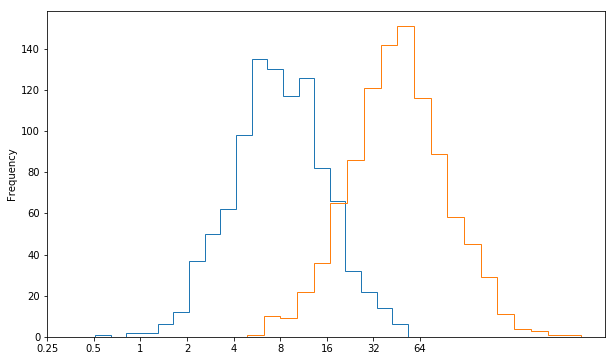

In [20]:
china2015.log10_income.plot(kind="hist", histtype="step", bins=20, figsize=(10,6))
usa2015.log10_income.plot(kind="hist", histtype="step", bins=20)
levels = [0.25,0.5,1,2,4,8,16,32,64]
plt.xticks(np.log10(levels), levels)

In [21]:
gapminder = pd.read_csv('Datos/gapminder/gapminder.xls')

In [22]:
china_pop2015 = float(gapminder.query('country == "China" and year == 2015').population) 
usa_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population) 

In [23]:
china_pop2015, usa_pop2015

(1376048943.0, 321773631.0)

In [24]:
china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

([<matplotlib.axis.XTick at 0xe271170>,
 <a list of 8 Text xticklabel objects>)

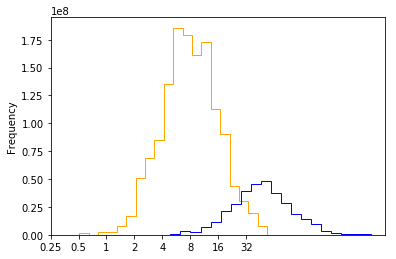

In [25]:
china2015.log10_income.plot.hist(histtype="step", bins=20, weights = china2015.weight, color="orange")
usa2015.log10_income.plot.hist(histtype="step", bins=20, weights = usa2015.weight, color="blue")
levels = [0.25, 0.5, 1, 2, 4, 8, 16, 32]
plt.xticks(np.log10(levels), levels)